# 1. Import Libraries

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 2. Load and Explore Dataset

In [83]:
train_file =pd.read_csv('train.csv', index_col = 'Id')

In [84]:
train_file.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

# 3. Data Cleaning

In [86]:
train_file.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [87]:
train_file.shape

(1460, 80)

In [88]:
selected_features = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'YearBuilt', 'YrSold', '1stFlrSF']
data = train_file[selected_features + ['SalePrice']]

data_clean = data.dropna()

data_clean.isnull().sum()

LotArea        0
TotalBsmtSF    0
GrLivArea      0
FullBath       0
YearBuilt      0
YrSold         0
1stFlrSF       0
SalePrice      0
dtype: int64

# 4. Feature Selection and Splitting

In [89]:
y = train_file.SalePrice
features = ['LotArea', 'TotalBsmtSF', 'GrLivArea','FullBath','YearBuilt','YrSold','1stFlrSF']
X = train_file[features].copy()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
X_train.head()

,LotArea,TotalBsmtSF,GrLivArea,FullBath,YearBuilt,YrSold,1stFlrSF
Id,,,,,,,
255,8400,1314,1314,1,1957,2010,1314
1067,7837,799,1571,2,1993,2009,799
639,8777,796,796,1,1910,2008,796
800,7200,731,1768,1,1937,2007,981
381,5000,1026,1691,2,1924,2010,1026


In [92]:
print(X_train.shape, X_test.shape)

(1168, 7) (292, 7)


#  5. Feature Scaling

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building Multiple Linear Regression Model

In [94]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [95]:
print(lr.coef_, lr.intercept_)

[ 5040.62899667 14137.67146611 40303.37843435  -564.44567786
 26935.21499696   452.03018712  2622.07171052] 181441.5419520548


# 7. Model Evaluation

In [96]:
y_test_pred = lr.predict(X_test_scaled)
print("🔹 Test Set Evaluation")
print("R²:", r2_score(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))

🔹 Test Set Evaluation
R²: 0.7378668393680922
MSE: 2010646851.7677152
MAE: 28058.641399755314


In [97]:
y_train_pred = lr.predict(X_train_scaled)
print("\n🔹 Train Set Evaluation")
print("R²:", r2_score(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))


🔹 Train Set Evaluation
R²: 0.6858366687818209
MSE: 1873843016.5273557
MAE: 26660.578658914295


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


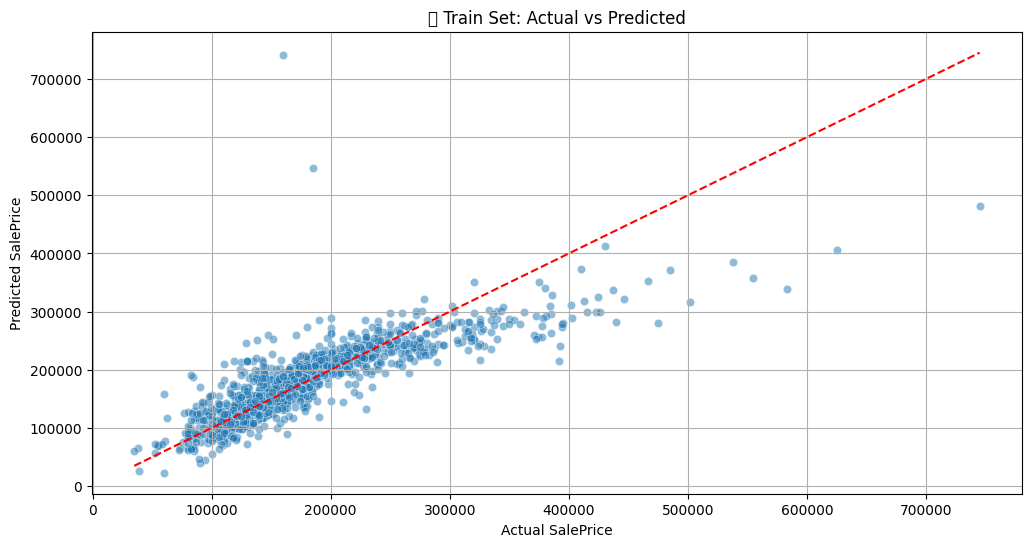

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


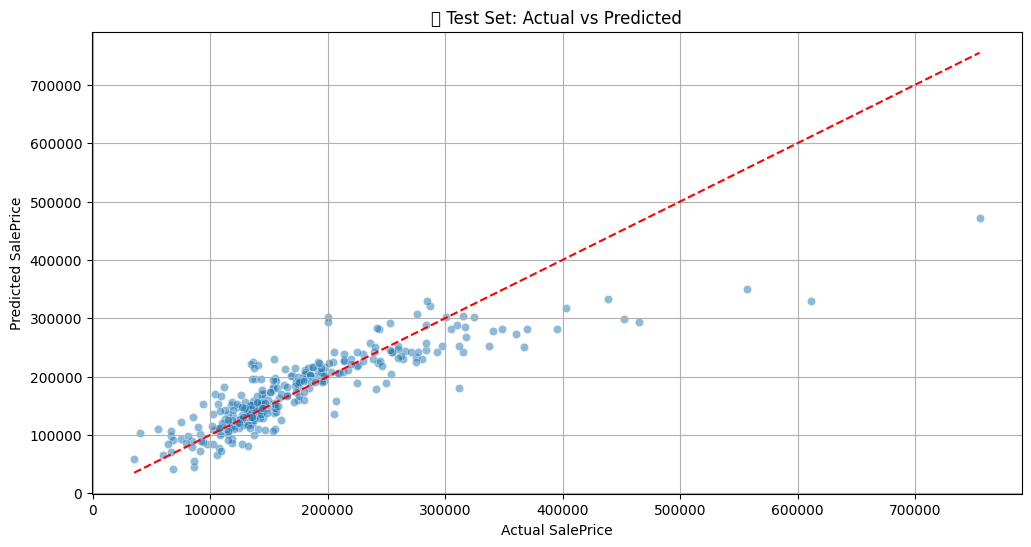

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("🔹 Train Set: Actual vs Predicted")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("🔹 Test Set: Actual vs Predicted")
plt.grid(True)
plt.show()

# Polynomial Regression

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("train.csv", index_col="Id")

features = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'YearBuilt', 'YrSold', '1stFlrSF']
df_clean = df[features + ['SalePrice']].dropna()

X = df_clean[features]
y = df_clean['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

steps = [
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),  
    ('lr', LinearRegression())
]

pipeline = Pipeline(steps)

param_grid = {'poly__degree': [2, 3, 4, 5, 7, 9]} 

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid.fit(X_train, y_train)

print("Best Polynomial Degree:", grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Polynomial Degree: {'poly__degree': 2}


In [100]:
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

result = pd.DataFrame({
    'MAE': [
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)
    ],
    'MSE': [
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)
    ],
    'R2': [
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)
    ]
}, index=['Train', 'Test'])

print("Model Evaluation")
print(result)


Model Evaluation
                MAE           MSE        R2
Train  23966.632281  1.213496e+09  0.796549
Test   25192.316631  1.521378e+09  0.801654


# # Saving the Model

In [101]:
joblib.dump(grid.best_estimator_, 'polynomial_regression_model_deg2.pkl')

['polynomial_regression_model_deg2.pkl']

In [102]:
loaded_model = joblib.load('polynomial_regression_model_deg2.pkl')

predictions = loaded_model.predict(X)

In [103]:
predictions

array([206139.23237521, 151218.84888751, 219782.19903882, ...,
       203151.10846463, 126570.95713305, 162654.17815752], shape=(1460,))

In [104]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

print("Cross-validation R² scores:", scores)
print("Average R² score:", np.mean(scores))

Cross-validation R² scores: [0.74413379 0.40534302 0.79564322 0.77895045 0.67463676]
Average R² score: 0.679741449592438


In [105]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

train_file = pd.read_csv("train.csv", index_col="Id")


features = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'YearBuilt', 'YrSold', '1stFlrSF']
df_clean = train_file[features + ['SalePrice']].dropna()

X = df_clean[features]
y = df_clean['SalePrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')


print("Cross-validation R² scores:", cv_scores)
print("Average R² score:", cv_scores.mean())

Cross-validation R² scores: [0.73656346 0.71587156 0.74947993 0.72063645 0.50325973]
Average R² score: 0.6851622278534839


In [106]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [107]:
model.score(X_test, y_test)

0.7378668393681019